# Analisis Sentimen Ulasan Aplikasi MyTelkomsel di Google Palystore

## Import library

In [1]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


In [2]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca

## Import data

In [14]:
dataset = pd.read_csv('data.csv')
dataset

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9670192e-5074-442b-91e2-a71925303094,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Makin hari makin BURUK! segala upaya biar lanc...,1,37,8.6.2,2025-02-08 04:32:21,"Hai Kak Ardinanto, Mohon maaf untuk ketidaknya...",2025-01-24 07:19:05,8.6.2
1,ce590d13-60cc-4f25-8092-e4a3430cf849,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Makin hari makin BURUK! segala upaya biar lanc...,1,3058,8.6.2,2025-01-25 18:08:25,Hai Kak RNP. Mohon maaf untuk ketidaknyamanann...,2025-01-26 04:44:33,8.6.2
2,792fa0db-d192-4499-8789-7aa36c3c9607,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Pulsa terpotong sendiri padahal tidak mengakti...,2,16,8.6.2,2025-02-07 17:35:09,"Maaf banget ya, Kak Febrian. Apabila Kakak men...",2024-06-15 12:20:28,8.6.2
3,6763f606-114d-4f01-820a-2184a28ca3d1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi itu dimana ketika di lakukannya suatu...,1,15,8.6.2,2025-02-07 00:24:42,"Hai Kak Fachru. Maaf bikin gak nyaman, silakan...",2025-02-07 05:17:48,8.6.2
4,3867fbac-0570-4a79-9fa9-d3d37cfd7ceb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,percuma beri ulasan tapi gak pernah di tanggap...,1,176,8.6.2,2025-02-01 11:20:43,"Maaf ya, Kak Rafi. Terkait kendala aplikasi My...",2024-08-13 23:39:02,8.6.2
...,...,...,...,...,...,...,...,...,...,...,...
4995,9f9213a7-8264-434e-a5f6-729fd3f03e6f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Setelah update malah gak bisa dibuka Ngebug mulu,1,0,8.6.1,2025-01-05 01:55:23,Hai Kak Yuli. Mohon maaf untuk ketidaknyamanan...,2025-01-05 06:39:02,8.6.1
4996,68a2340f-f49a-4dd6-a729-4da1a7f4cddb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Apk bgo ga bisa di buka sama sekali sekalinya ...,1,0,8.6.1,2025-01-10 13:14:06,Hai Kak Habib. Mohon maaf untuk ketidaknyamana...,2025-01-10 14:46:32,8.6.1
4997,a74d2d58-dcda-481f-8760-a054c762a3ec,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Jaringan sampah.leletnya keterlaluan aplikasi ...,1,0,8.6.1,2025-01-06 23:13:09,"Hai Kak Yudi, Mohon maaf untuk ketidaknyamanan...",2025-01-07 06:16:31,8.6.1
4998,2c2ea031-659b-41f7-b966-5eba3c9dc6fd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya setelah di perbaharui aplikasi tid...,1,1,8.6.1,2025-01-03 04:19:57,"Hai, Kak Firdaus. Mohon maaf untuk ketidaknyam...",2025-02-08 09:04:35,8.6.1


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              5000 non-null   object
 1   userName              5000 non-null   object
 2   userImage             5000 non-null   object
 3   content               5000 non-null   object
 4   score                 5000 non-null   int64 
 5   thumbsUpCount         5000 non-null   int64 
 6   reviewCreatedVersion  5000 non-null   object
 7   at                    5000 non-null   object
 8   replyContent          5000 non-null   object
 9   repliedAt             5000 non-null   object
 10  appVersion            5000 non-null   object
dtypes: int64(2), object(9)
memory usage: 429.8+ KB


## Pre processing data

In [10]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

Inisiasi Slangwords yang kemungkinan ada di data ulasan

In [11]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "makin": "semakin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [16]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
dataset['text_clean'] = dataset['content'].astype(str).apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
dataset['text_casefoldingText'] = dataset['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
dataset['text_slangwords'] = dataset['text_casefoldingText'].apply(fix_slangwords)

# Stemming kata-kata dan menyimpannya di 'text_stemm'
dataset['text_stemm'] = dataset['text_slangwords'].apply(stemmingText)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
dataset['text_tokenizingText'] = dataset['text_stemm'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
dataset['text_stopword'] = dataset['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
dataset['text_akhir'] = dataset['text_stopword'].apply(toSentence)

In [17]:
dataset

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_stemm,text_tokenizingText,text_stopword,text_akhir
0,9670192e-5074-442b-91e2-a71925303094,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Makin hari makin BURUK! segala upaya biar lanc...,1,37,8.6.2,2025-02-08 04:32:21,"Hai Kak Ardinanto, Mohon maaf untuk ketidaknya...",2025-01-24 07:19:05,8.6.2,Makin hari makin BURUK segala upaya biar lanca...,makin hari makin buruk segala upaya biar lanca...,semakin hari semakin buruk segala upaya biar l...,makin hari makin buruk segala upaya biar lanca...,"[makin, hari, makin, buruk, segala, upaya, bia...","[buruk, upaya, biar, lancar, masuk, aplikasi, ...",buruk upaya biar lancar masuk aplikasi ubah cl...
1,ce590d13-60cc-4f25-8092-e4a3430cf849,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Makin hari makin BURUK! segala upaya biar lanc...,1,3058,8.6.2,2025-01-25 18:08:25,Hai Kak RNP. Mohon maaf untuk ketidaknyamanann...,2025-01-26 04:44:33,8.6.2,Makin hari makin BURUK segala upaya biar lanca...,makin hari makin buruk segala upaya biar lanca...,semakin hari semakin buruk segala upaya biar l...,makin hari makin buruk segala upaya biar lanca...,"[makin, hari, makin, buruk, segala, upaya, bia...","[buruk, upaya, biar, lancar, masuk, aplikasi, ...",buruk upaya biar lancar masuk aplikasi ubah cl...
2,792fa0db-d192-4499-8789-7aa36c3c9607,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Pulsa terpotong sendiri padahal tidak mengakti...,2,16,8.6.2,2025-02-07 17:35:09,"Maaf banget ya, Kak Febrian. Apabila Kakak men...",2024-06-15 12:20:28,8.6.2,Pulsa terpotong sendiri padahal tidak mengakti...,pulsa terpotong sendiri padahal tidak mengakti...,pulsa terpotong sendiri padahal tidak mengakti...,pulsa potong sendiri padahal tidak aktif data ...,"[pulsa, potong, sendiri, padahal, tidak, aktif...","[pulsa, potong, aktif, data, seluler, isi, pul...",pulsa potong aktif data seluler isi pulsa noti...
3,6763f606-114d-4f01-820a-2184a28ca3d1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi itu dimana ketika di lakukannya suatu...,1,15,8.6.2,2025-02-07 00:24:42,"Hai Kak Fachru. Maaf bikin gak nyaman, silakan...",2025-02-07 05:17:48,8.6.2,Aplikasi itu dimana ketika di lakukannya suatu...,aplikasi itu dimana ketika di lakukannya suatu...,aplikasi itu dimana ketika di lakukannya suatu...,aplikasi itu mana ketika di laku suatu update ...,"[aplikasi, itu, mana, ketika, di, laku, suatu,...","[aplikasi, laku, update, bagus, jelek, segi, t...",aplikasi laku update bagus jelek segi tampil u...
4,3867fbac-0570-4a79-9fa9-d3d37cfd7ceb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,percuma beri ulasan tapi gak pernah di tanggap...,1,176,8.6.2,2025-02-01 11:20:43,"Maaf ya, Kak Rafi. Terkait kendala aplikasi My...",2024-08-13 23:39:02,8.6.2,percuma beri ulasan tapi gak pernah di tanggap...,percuma beri ulasan tapi gak pernah di tanggap...,percuma beri ulasan tapi gak pernah di tanggap...,percuma beri ulas tapi gak pernah di tanggap b...,"[percuma, beri, ulas, tapi, gak, pernah, di, t...","[ulas, tanggap, aplikasi, berat, loading, bang...",ulas tanggap aplikasi berat loading banget bug...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9f9213a7-8264-434e-a5f6-729fd3f03e6f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Setelah update malah gak bisa dibuka Ngebug mulu,1,0,8.6.1,2025-01-05 01:55:23,Hai Kak Yuli. Mohon maaf untuk ketidaknyamanan...,2025-01-05 06:39:02,8.6.1,Setelah update malah gak bisa dibuka Ngebug mulu,setelah update malah gak bisa dibuka ngebug mulu,setelah update malah gak bisa dibuka ngebug mulu,telah update malah gak bisa buka ngebug mulu,"[telah, update, malah, gak, bisa, buka, ngebug...","[update, buka, ngebug, mulu]",update buka ngebug mulu
4996,68a2340f-f49a-4dd6-a729-4da1a7f4cddb,Pengguna G

# Pelabelan Data

In [20]:
import csv
import requests
from io import StringIO

# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [21]:
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    # else:
    #     polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [22]:
results = dataset['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
dataset['polarity_score'] = results[0]
dataset['polarity'] = results[1]
print(dataset['polarity'].value_counts())

polarity
negative    3771
positive    1229
Name: count, dtype: int64


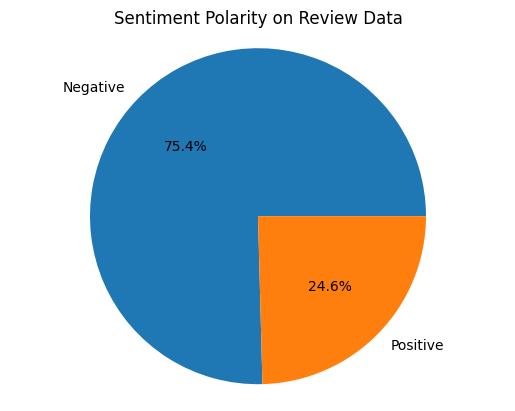

In [23]:
import matplotlib.pyplot as plt
neg = dataset['polarity'].value_counts()['negative']
pos = dataset['polarity'].value_counts()['positive']

# Data
labels = ['Negative', 'Positive']
sizes = [neg,pos]

# Membuat pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # Menjaga proporsi lingkaran tetap bulat
plt.title("Sentiment Polarity on Review Data")
plt.show()


## Feature Extraction with TF-idf

In [49]:
from sklearn.model_selection import train_test_split

# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = dataset['text_akhir']
y = dataset['polarity']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=20, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [57]:
X_train.shape

(4000, 200)

In [59]:
X_test.shape

(1000, 200)

## Modeling with ML

In [67]:
from sklearn.svm import SVC

# Inisialisasi model SVM dengan class weight balanced
svm_model = SVC(class_weight='balanced', kernel='linear', random_state=42)

# Melatih model
svm_model.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = svm_model.predict(X_train.toarray())
y_pred_test_rf = svm_model.predict(X_test.toarray())

# Evaluasi akurasi model SVM
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('SVM - accuracy_train:', accuracy_train_rf)
print('SVM - accuracy_test:', accuracy_test_rf)

SVM - accuracy_train: 0.88275
SVM - accuracy_test: 0.874


In [52]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression(class_weight='balanced')

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.88525
Logistic Regression - accuracy_test: 0.878


## Prediction new sentences

In [53]:
# MENGGUNAKAN LOGISTIK REGRESI
# Contoh kalimat baru
new_sentences = ["Saya sangat senang dengan layanan ini",
                 "Produk ini sangat jelek sekali"]

# Ubah kalimat baru menjadi representasi numerik
X_new = tfidf.transform(new_sentences)

# Lakukan prediksi
y_pred_new = logistic_regression.predict(X_new.toarray())

# Tampilkan hasil prediksi
print("Prediksi sentimen:", y_pred_new)


Prediksi sentimen: ['positive' 'negative']


In [64]:
# MENGGUNAKAN SVM
# Contoh kalimat baru
new_sentences = ["Saya sangat puas dengan layanan ini",
                  "Produk ini sangat buruk dan mengecewakan"]

# Ubah kalimat baru menjadi representasi numerik
X_new = tfidf.transform(new_sentences)

# Lakukan prediksi
y_pred_new = svm_model.predict(X_new.toarray())

# Tampilkan hasil prediksi
print("Prediksi sentimen:", y_pred_new)


Prediksi sentimen: ['positive' 'negative']


In [76]:
 pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.3.0
aiohappyeyeballs==2.4.4
aiohttp==3.11.11
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.3
ale-py==0.10.1
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.6.0
arviz==0.20.0
astropy==7.0.0
astropy-iers-data==0.2025.2.3.0.32.42
astunparse==1.6.3
atpublic==4.1.0
attrs==25.1.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
beautifulsoup4==4.13.3
bigframes==1.34.0
bigquery-magics==0.5.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==3.0.0
bokeh==3.6.2
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.1
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.88
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.20.0
cloudpickle==3.1.1
cmake==3.31.4
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy==1.3.1
cr